In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
data = pd.read_csv("HotelCancelation.csv")

In [4]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
print(data.head())
print(data.shape)

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [6]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
data.isnull().values.any()

False

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
import holidays
from workalendar.europe import UnitedKingdom

In [10]:
data_new = data
cols = ["arrival_year","arrival_month","arrival_date"]
data_new = data_new.sort_values(by = cols)
data_new['date_of_arrival'] = data_new[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [11]:
print("Number of Rows containing invalid dates:",data_new["date_of_arrival"].str.contains("2018-2-29", na=False).sum())
data_new.drop(data_new[(data_new['date_of_arrival'] == "2018-2-29")].index, inplace=True)
data_new

Number of Rows containing invalid dates: 37


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [12]:
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [13]:
sub_data_new = data_new.loc[data_new["booking_status"].str.contains("Not_Canceled"),:]

In [14]:
sub_data_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'date_of_arrival'],
      dtype='object')

In [15]:
sub_data_new.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time','date_of_arrival',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests','booking_status'], axis=1, inplace=True)

In [16]:
sub_data_new

,arrival_year,arrival_month
583,2017,7
2538,2017,7
5884,2017,7
8290,2017,7
8762,2017,7
...,...,...
28291,2018,12
29690,2018,12
32027,2018,12
32894,2018,12


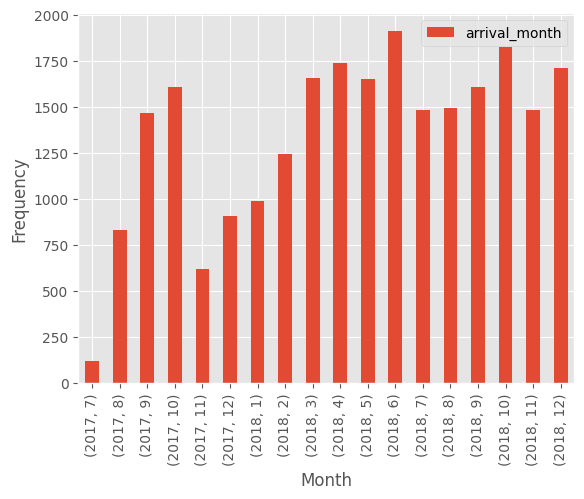

In [17]:
sub_data_new.groupby([sub_data_new.arrival_year, sub_data_new[data_new["booking_status"] == "Not_Canceled"].arrival_month]).count().plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

In [18]:

# data_new["total_no_of_nights"] = data_new["no_of_weekend_nights"] + data_new["no_of_week_nights"]
# data_new = data_new.drop(["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","arrival_year","arrival_month","arrival_date","Booking_ID"],axis=1)
# data_new

In [19]:
holiday_list = []
for holiday in holidays.UnitedKingdom(years=[2017, 2018]).items():
    holiday_list.append(holiday)

holidays_df = pd.DataFrame(holiday_list, columns=["date", "holiday"])
holidays_df

,date,holiday
0,2017-01-01,New Year's Day
1,2017-01-02,New Year Holiday [Scotland]; New Year's Day (O...
2,2017-01-03,New Year Holiday [Scotland] (Observed)
3,2017-03-17,St. Patrick's Day [Northern Ireland]
4,2017-07-12,Battle of the Boyne [Northern Ireland]
5,2017-08-07,Summer Bank Holiday [Scotland]
6,2017-11-30,St. Andrew's Day [Scotland]
7,2017-12-25,Christmas Day
8,2017-04-14,Good Friday
9,2017-04-17,Easter Monday [England/Wales/Northern Ireland]


In [20]:
uk_holidays = holidays.UnitedKingdom(years=[2017, 2018])
data_new["is_holiday"] = [date in uk_holidays for date in data_new["date_of_arrival"]]
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,is_holiday
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,...,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1,False
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,...,1,Online,0,0,0,101.50,0,Canceled,2017-7-1,False
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,...,1,Online,0,0,0,101.50,0,Canceled,2017-7-1,False
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,...,1,Online,0,0,0,101.50,0,Canceled,2017-7-1,False
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,...,1,Online,0,0,0,68.00,1,Canceled,2017-7-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,...,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31,False
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,...,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31,False
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,...,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31,False
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,...,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31,False


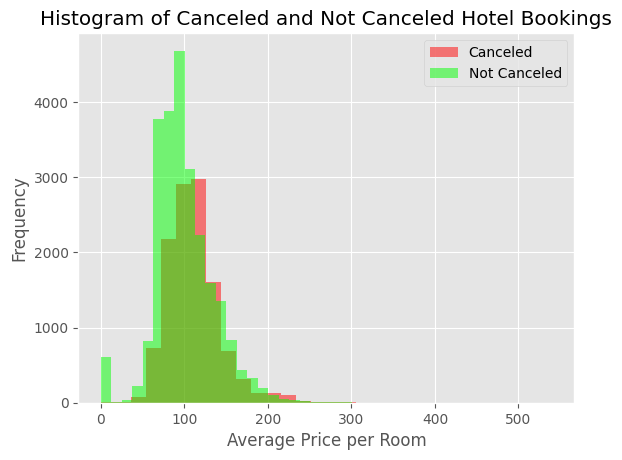

In [21]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].avg_price_per_room,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].avg_price_per_room,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Average Price per Room")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


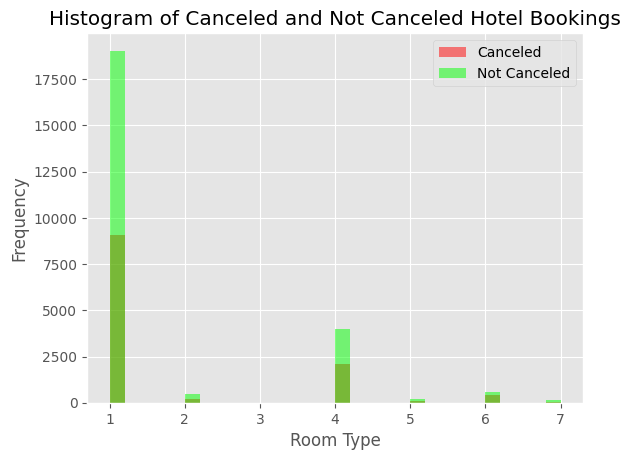

In [22]:
copy_data_new = data_new
copy_data_new = copy_data_new.sort_values(by = "room_type_reserved")
copy_data_new = copy_data_new.replace({"room_type_reserved":{"Room_Type 1":"1","Room_Type 2":"2","Room_Type 3":"3","Room_Type 4":"4","Room_Type 5":"5","Room_Type 6":"6","Room_Type 7":"7"}})
c = plt.hist(copy_data_new[copy_data_new["booking_status"] == "Canceled"].room_type_reserved,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(copy_data_new[copy_data_new["booking_status"] == "Not_Canceled"].room_type_reserved,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


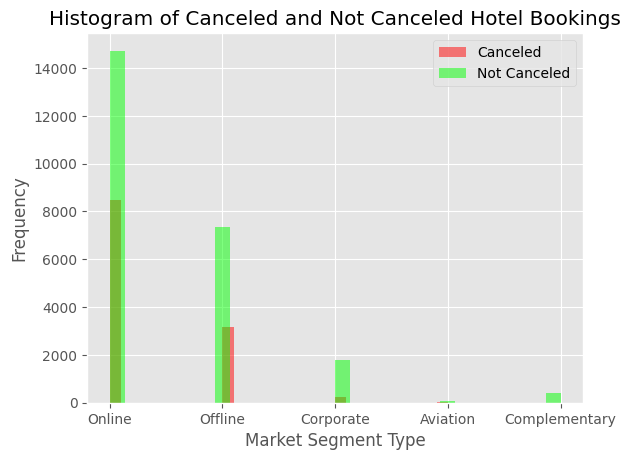

In [23]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].market_segment_type,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].market_segment_type,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Market Segment Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

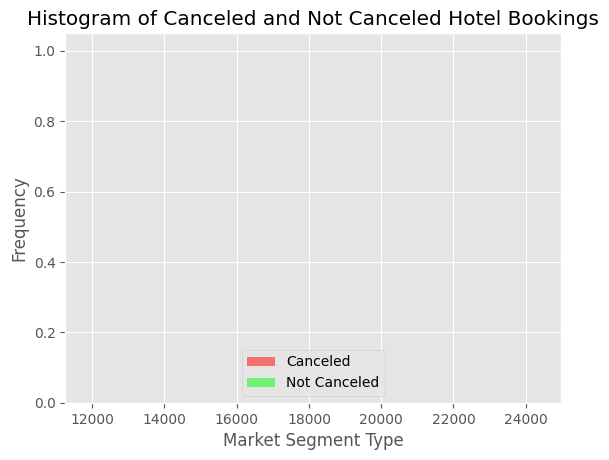

In [24]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].is_holiday.count(),bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].is_holiday.count(),bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Market Segment Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

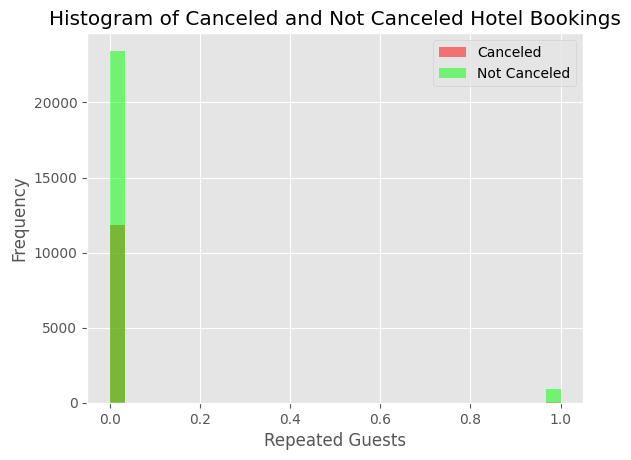

In [25]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

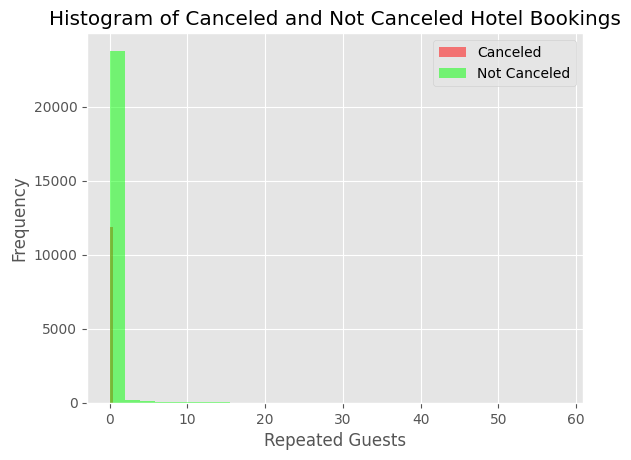

In [26]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()



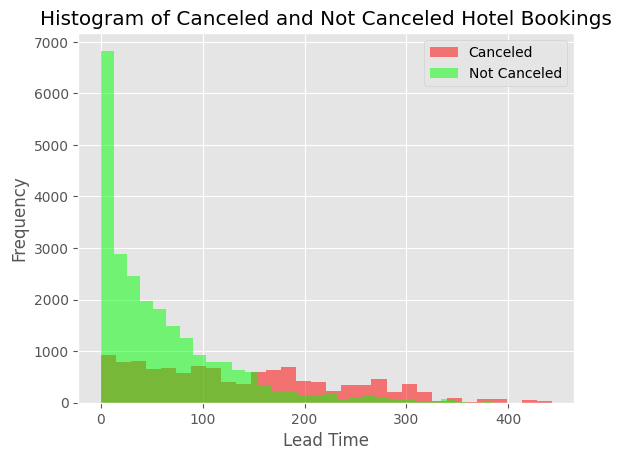

In [27]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].lead_time,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].lead_time,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


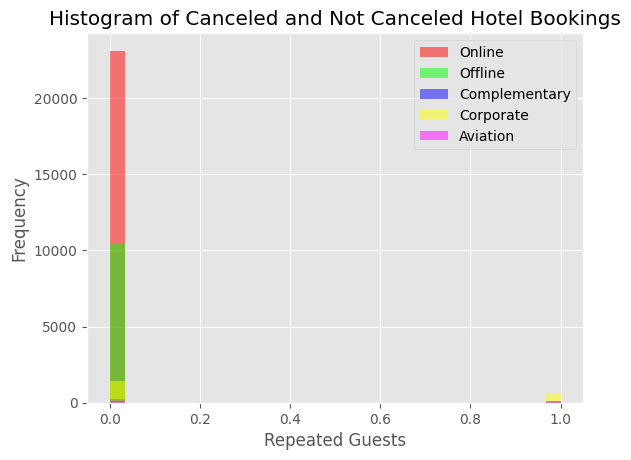

In [28]:
on = plt.hist(data_new[data_new["market_segment_type"] == "Online"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Online")
of = plt.hist(data_new[data_new["market_segment_type"] == "Offline"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Offline")
comp = plt.hist(data_new[data_new["market_segment_type"] == "Complementary"].repeated_guest,bins=30,fc = (0,0,1,0.5),label = "Complementary")
corp = plt.hist(data_new[data_new["market_segment_type"] == "Corporate"].repeated_guest,bins=30,fc = (1,1,0,0.5),label = "Corporate")
a = plt.hist(data_new[data_new["market_segment_type"] == "Aviation"].repeated_guest,bins=30,fc = (1,0,1,0.5),label = "Aviation")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

In [29]:
data_canceled = data_new[data_new["booking_status"] == "Canceled"]
data_not_canceled = data_new[data_new["booking_status"] == "Not_Canceled"]
desc1 = data_canceled.avg_price_per_room.describe()
print(desc1)
Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("For Canceled Bookings, anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.avg_price_per_room < lower_bound].avg_price_per_room
print(" Canceled Booking Outliers: ",data_canceled[(data_canceled.avg_price_per_room < lower_bound)|(data_canceled.avg_price_per_room > upper_bound)].avg_price_per_room.values)

count    11878.000000
mean       110.607933
std         32.263124
min          0.000000
25%         89.400000
50%        108.000000
75%        126.397500
max        540.000000
Name: avg_price_per_room, dtype: float64
For Canceled Bookings, anything outside this range is an outlier: ( 33.903750000000024 , 181.89374999999998 )
 Canceled Booking Outliers:  [ 12.     0.   209.5  200.   224.67 224.67 224.67 224.67 224.67 224.67
 206.   224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67
 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67
 231.    19.15  19.15  19.15  19.15 250.     0.   205.     0.   230.
  12.   193.    12.   195.4   12.   214.6  212.42 189.   182.7  230.
  14.   182.   211.   183.67 185.67 201.95 540.   182.   224.33 254.
 216.   202.3  221.   203.76 189.9  199.4  196.   200.75 196.   203.33
 190.58 228.6  191.5  186.3  201.   191.58 197.    26.35 206.   228.6
 203.5  260.5  197.78 218.96 185.1  198.9  207.9  217.67 198.9  187.85
 198.9  210.

In [30]:
desc2 = data_canceled.lead_time.describe()
print(desc2)
Q1 = desc2[4]
Q3 = desc2[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.lead_time < lower_bound].lead_time
print("Outliers: ",data_canceled[(data_canceled.lead_time < lower_bound)|(data_canceled.lead_time > upper_bound)].lead_time.values)

count    11878.000000
mean       139.266206
std         98.951899
min          0.000000
25%         55.000000
50%        122.000000
75%        205.000000
max        443.000000
Name: lead_time, dtype: float64
Anything outside this range is an outlier: ( -170.0 , 430.0 )
Outliers:  [443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443
 443 443 443 443 433 433 433 433 433 433 433 433 433 433 433 433 433 433
 433 433 433 433 433 433]


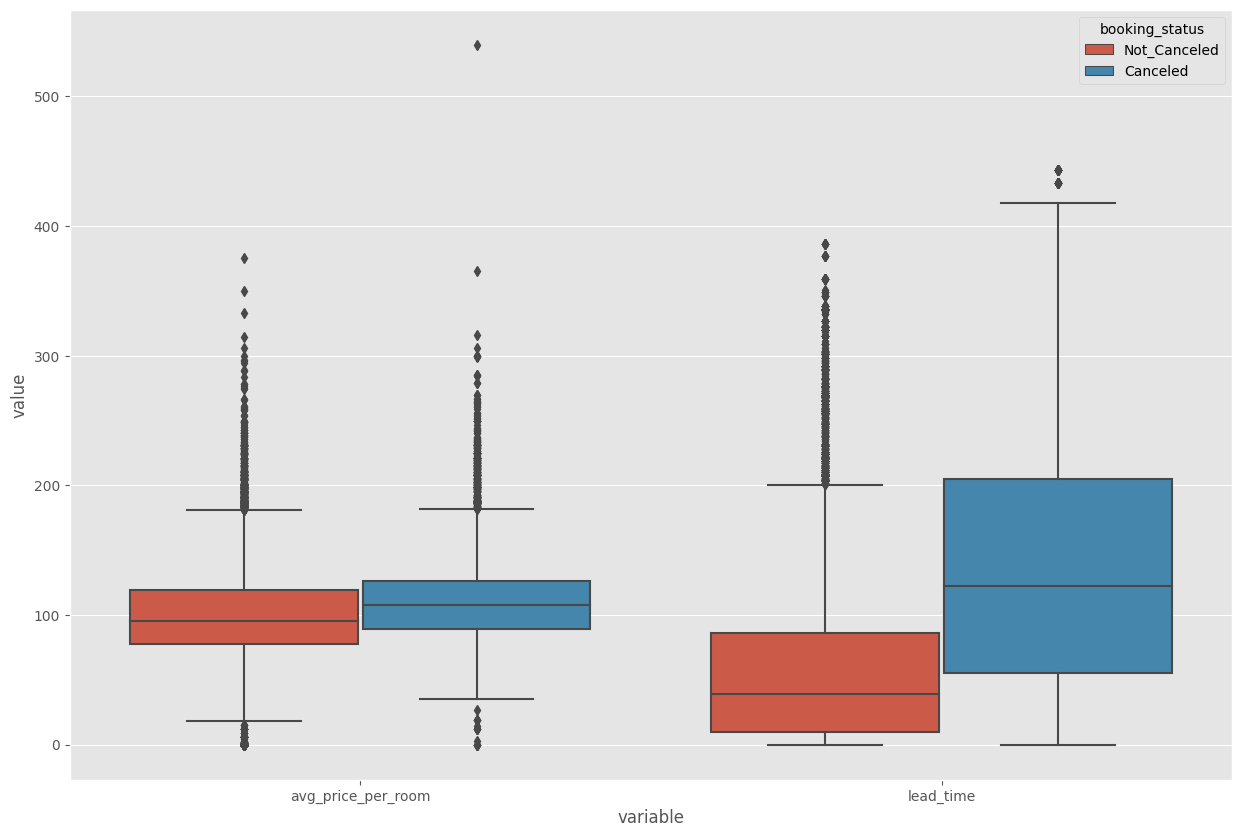

In [31]:
melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['avg_price_per_room', 'lead_time'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
plt.show()

In [32]:
# melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['no_of_guests'])
# plt.figure(figsize = (15,10))
# sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
# plt.show()

In [33]:
train_data = data_new

In [34]:
train_data = train_data.drop(["Booking_ID","date_of_arrival"], axis =1)

In [35]:
train_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_holiday
583,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,False
695,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,False
769,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,False
1132,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,False
1775,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,False
32894,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,False
33442,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,False
33902,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,False


In [36]:
test_data = data_new["booking_status"]

In [37]:
test_data

583      Not_Canceled
695          Canceled
769          Canceled
1132         Canceled
1775         Canceled
             ...     
32027    Not_Canceled
32894    Not_Canceled
33442    Not_Canceled
33902        Canceled
35130        Canceled
Name: booking_status, Length: 36238, dtype: object

In [38]:
data_new_1 =data_new.replace({"booking_status":{"Canceled":1,"Not_Canceled":0}})

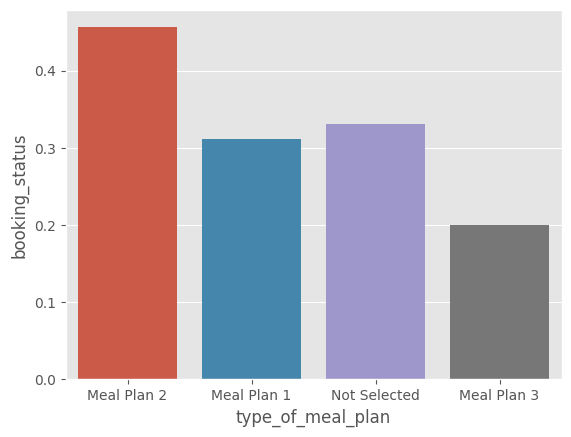

In [39]:
meal_type_plot = sns.barplot(x='type_of_meal_plan', y='booking_status', data=data_new_1, ci=None)

In [40]:
data_new_1 =data_new.replace({"booking_status":{"Canceled":0,"Not_Canceled":1}})

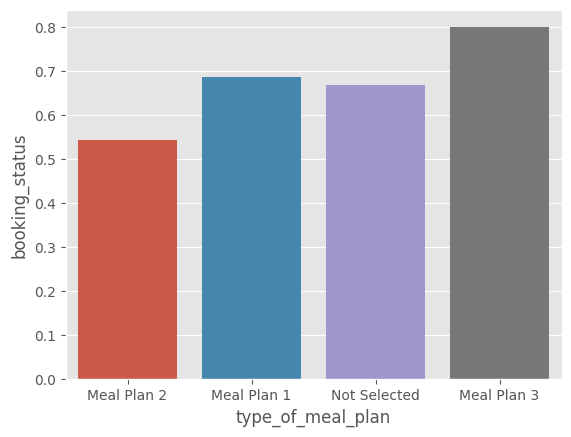

In [41]:
meal_type_plot = sns.barplot(x='type_of_meal_plan', y='booking_status', data=data_new_1, ci=None)

<AxesSubplot:>

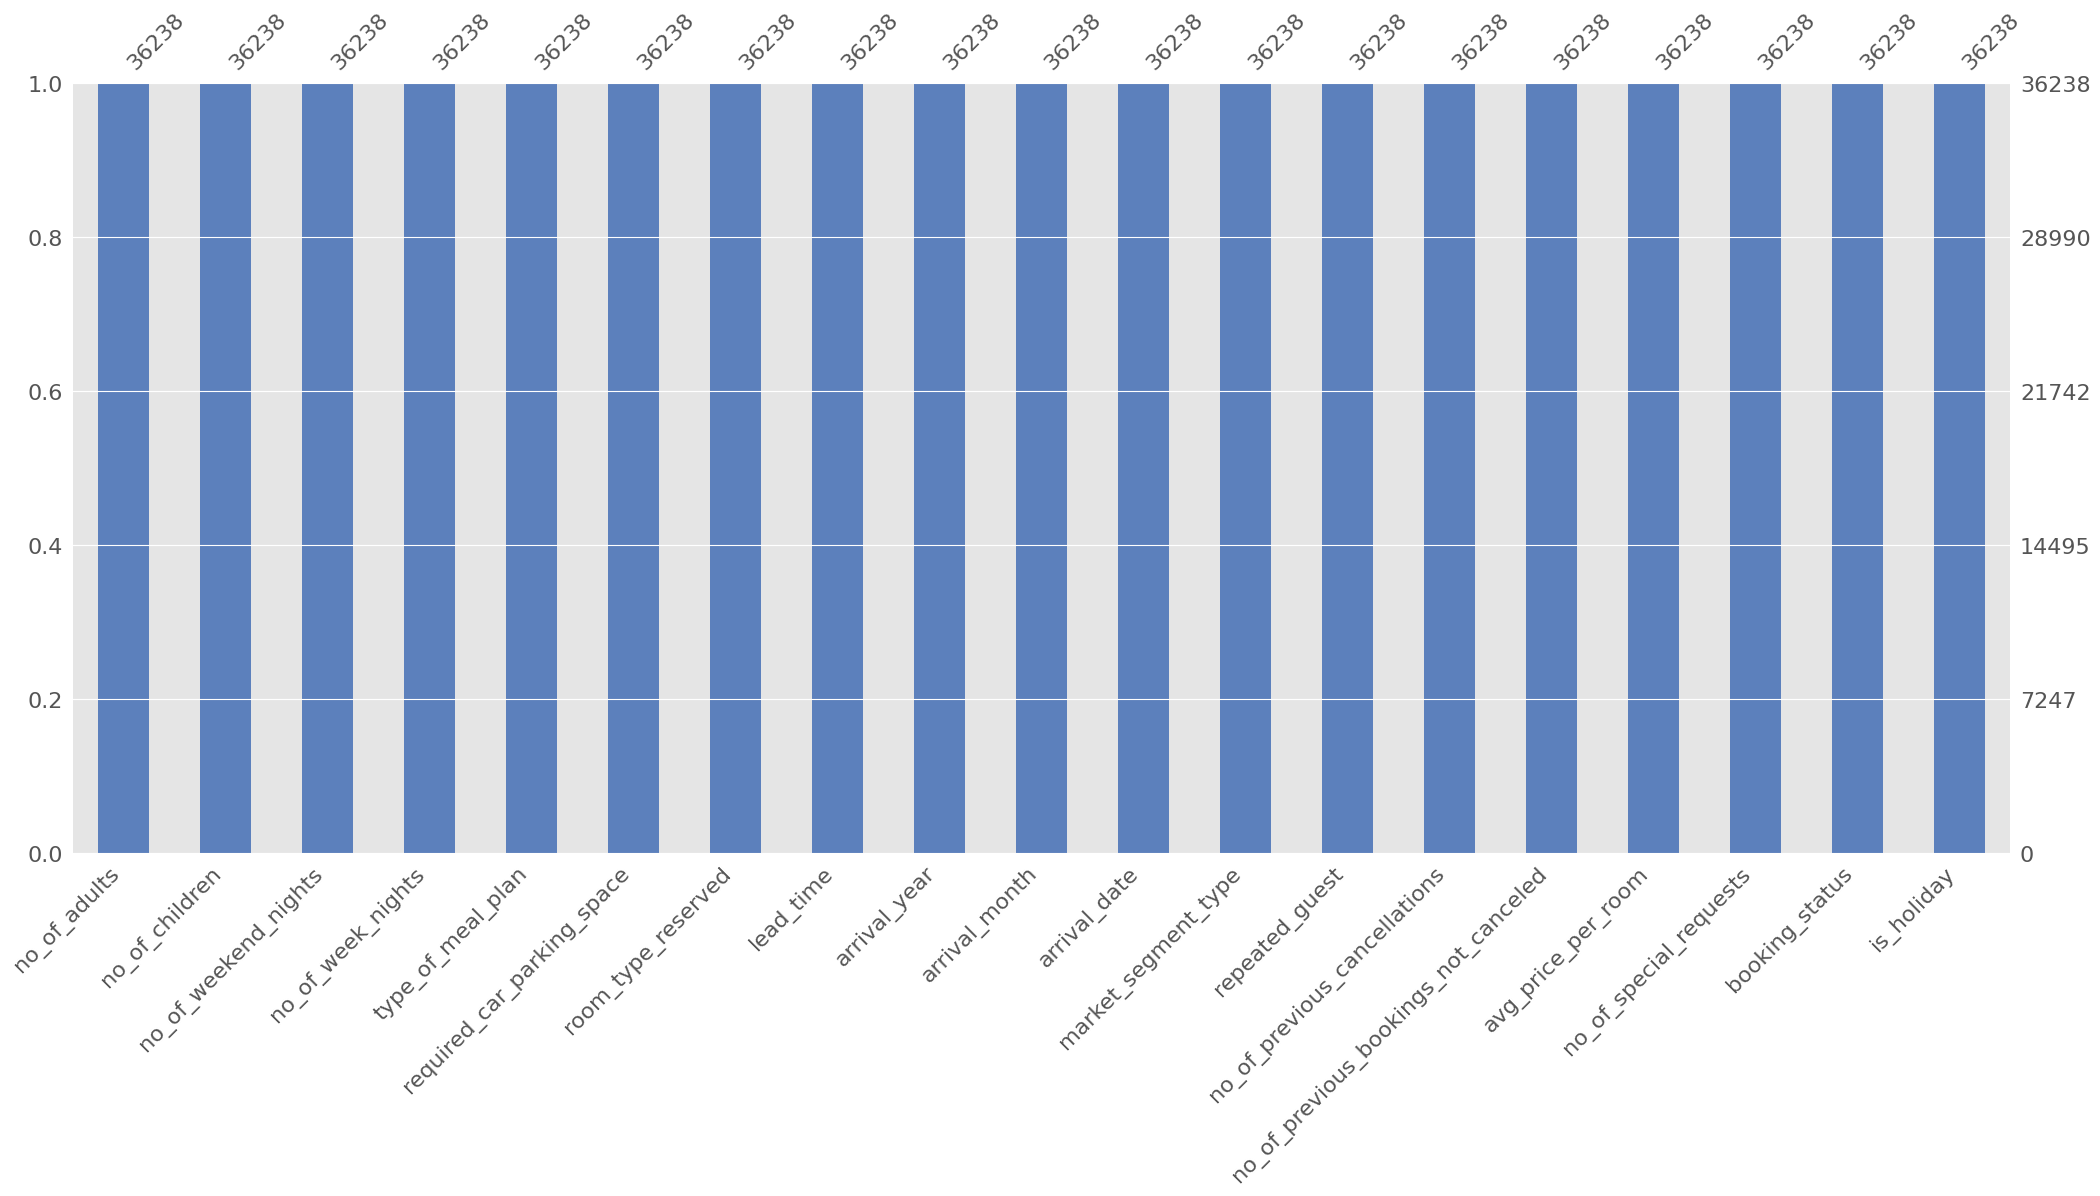

In [42]:
import missingno as msno
msno.bar(train_data, color=(92/255, 128/255, 188/255))

In [43]:
train_data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
is_holiday                              0
dtype: int64

In [44]:
test_data.isna().sum()

0

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 583 to 35130
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  int64  
 8   arrival_year                          36238 non-null  int64  
 9   arrival_month                         36238 non-null  int64  
 10  arrival_date                          36238 non-null  int64  
 11  market_segmen

In [46]:
train_data['avg_price_per_room'] = train_data['avg_price_per_room'].astype('int64')

In [47]:
train_data.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 5',
       'Room_Type 6', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [48]:
train_data =train_data.replace({"type_of_meal_plan": {"Not Selected":0,"Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3" : 3, "Meal Plan 4": 4, "Meal Plan 5" : 5, "Meal Plan 6" : 6, "Meal Plan 7" : 7},"market_segment": {"Offline": 0, "Online": 1, "Corporate": 2, "Aviation": 3, "Complementary": 4},"room_type_reserved":{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4,
       'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}, "booking_status":{"Canceled":1,"Not_Canceled":0},"is_holiday":{False:0, True:1}})

In [49]:
train_data = train_data.rename(columns = {'booking_status': 'target'})

In [50]:
train_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,target,is_holiday
583,1,0,0,2,2,0,1,257,2017,7,1,Offline,0,0,0,80,0,0,0
695,2,0,0,2,2,0,1,257,2017,7,1,Online,0,0,0,101,0,1,0
769,2,0,0,2,2,0,1,257,2017,7,1,Online,0,0,0,101,0,1,0
1132,2,0,0,2,2,0,1,257,2017,7,1,Online,0,0,0,101,0,1,0
1775,1,0,0,4,1,0,1,65,2017,7,1,Online,0,0,0,68,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,2,2,0,1,1,0,6,260,2018,12,31,Online,0,0,0,168,0,0,0
32894,2,0,2,1,1,0,1,103,2018,12,31,Offline,0,0,0,150,0,0,0
33442,2,1,1,1,1,0,1,269,2018,12,31,Online,0,0,0,105,0,0,0
33902,3,0,2,1,1,0,1,103,2018,12,31,Offline,0,0,0,205,0,1,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('target',axis=1), train_data['target'], test_size = 0.2, random_state = 42)

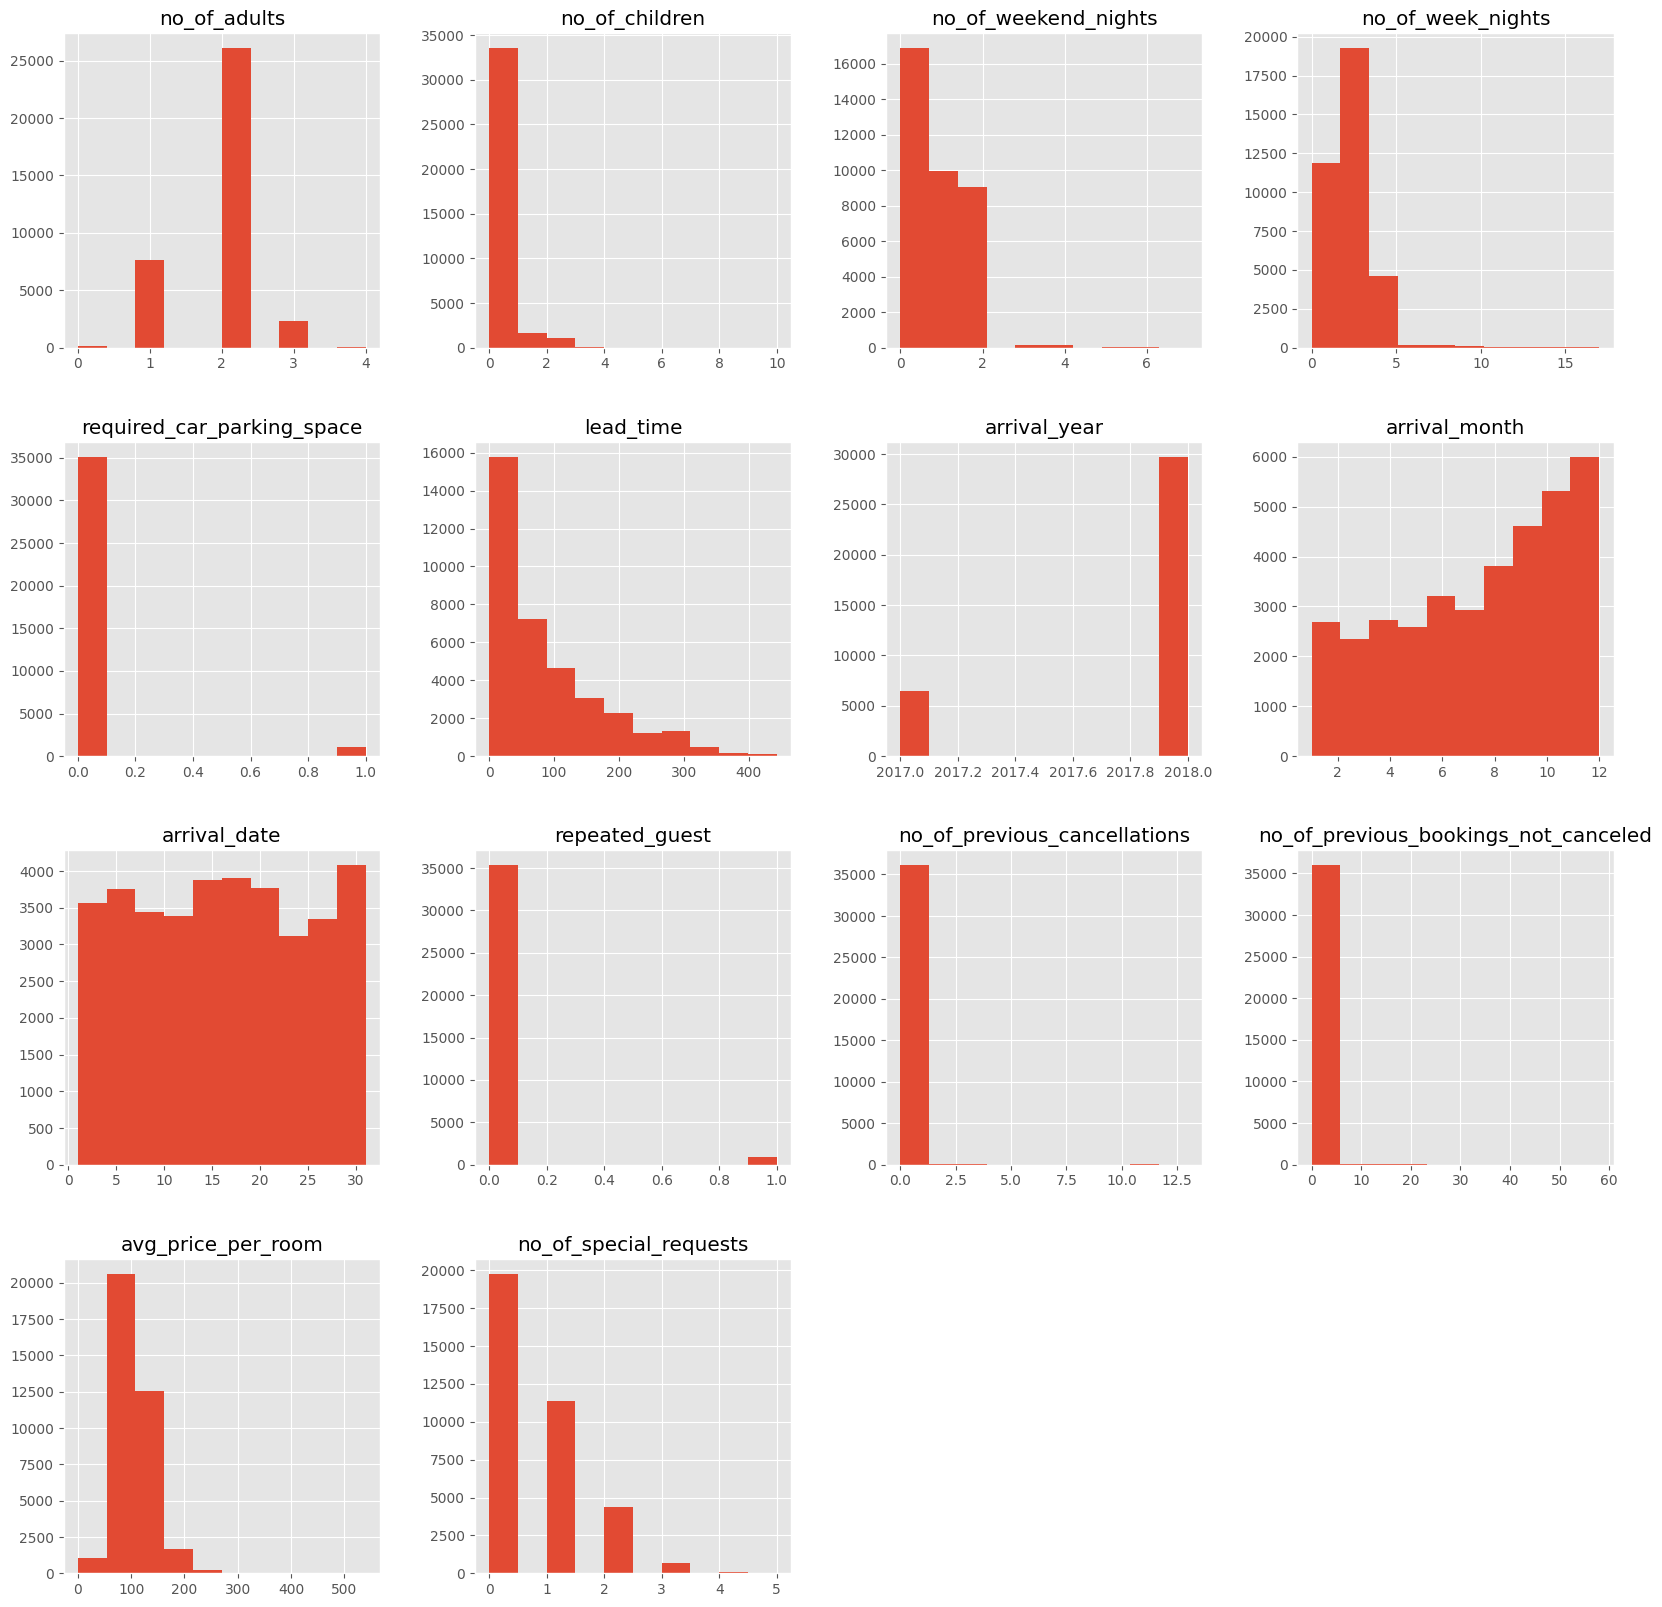

In [53]:
p = data_new.hist(figsize = (20,20))

In [54]:
from sklearn.model_selection import GridSearchCV